### 2022年度プログラミング演習A・B

# 第10回レポート課題の解説

### 演習1

SOR法のアルゴリズムを実現するコードを書き、

$$
A=
\begin{pmatrix}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1 & 2 & -1\\
0 & 0 & -1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
1\\
1\\
1
\end{pmatrix}
$$

に対して $Ax=b$ の近似解を求めてください。ただし、

$$
x^{(0)}=
\begin{pmatrix}
0\\
0\\
0\\
0
\end{pmatrix}
,\quad EPS=10^{-5},\quad K=100,\quad w=1.5
$$

とします。

In [1]:
A = [2,-1,0,0; -1,2,-1,0; 0,-1,2,-1; 0,0,-1,2];
b = [1;1;1;1];
EPS = 1E-5;
K = 100;
w = 1.5;
x = [0;0;0;0];

n = size(A,1);
k = 0;

while norm(b-A*x,Inf) >= EPS && k <= K
    for i = 1:n
        tmp = b(i);
        for j = 1:i-1
            tmp = tmp-A(i,j)*x(j);
        end
        for j = i+1:n
            tmp = tmp-A(i,j)*x(j);
        end
        x(i) = (1-w)*x(i)+w*tmp/A(i,i);  %wを用いてx(i)を更新する
    end
    k = k+1;
end

if k > K
    printf("%d回の反復では、近似解を求めることができなかった。\n",K)
else
    printf("%d回の反復で、次の近似解を求めることができた。\n",k)
    printf("%.15f\n",x)
end

19回の反復で、次の近似解を求めることができた。
1.999996142430643
2.999994924546839
2.999998348368432
2.000001772195130


### 演習2

演習1と同様に

$$
A=
\begin{pmatrix}
2 & -1 & 0 & 0\\
-1 & 2 & -1 & 0\\
0 & -1 & 2 & -1\\
0 & 0 & -1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
1\\
1\\
1
\end{pmatrix},
$$

$$
x^{(0)}=
\begin{pmatrix}
0\\
0\\
0\\
0
\end{pmatrix}
,\quad EPS=10^{-5},\quad K=100
$$

に対してSOR法を適用する際に、

$$
w=1,1.1,1.2,\ldots,1.8,1.9
$$

の中から最も収束の速い（反復回数の少ない）ものを求め、その $w$ の値と反復回数を表示してください。ただし、最適値の判定はプログラムの中で行うようにすること。

In [2]:
A = [2,-1,0,0; -1,2,-1,0; 0,-1,2,-1; 0,0,-1,2];
b = [1;1;1;1];
EPS = 1E-5;
K = 100;
n = size(A,1);

min_w = 0;  %反復回数が最小値をとるようなwの候補
min_k = K+1;  %反復回数の最小値の候補（初期値を十分大きな値にしておく）

for w = 1:0.1:1.9  %wを変化させてSOR法を繰り返す
    x = [0;0;0;0];  %変数xとkはSOR法を実行すると値が変わるため、for文の中で初期化する必要がある
    k = 0;
    while norm(b-A*x,Inf) >= EPS && k <= K
        for i = 1:n
            tmp = b(i);
            for j = 1:i-1
                tmp = tmp-A(i,j)*x(j);
            end
            for j = i+1:n
                tmp = tmp-A(i,j)*x(j);
            end
            x(i) = (1-w)*x(i)+w*tmp/A(i,i);
        end
        k = k+1;
    end
    if k < min_k  %反復回数が最小値の候補より小さければ、候補を更新する
        min_w = w;
        min_k = k;
    end
end

printf("wの最適値は%f、反復回数は%d\n",min_w,min_k)

wの最適値は1.300000、反復回数は11


### 演習3（オプション）

SOR法による収束の様子を可視化して確認します。

$$
A=
\begin{pmatrix}
2 & -1\\
1 & 2
\end{pmatrix}
,\quad b=
\begin{pmatrix}
1\\
3
\end{pmatrix},
$$

$$
x^{(0)}=
\begin{pmatrix}
0\\
0
\end{pmatrix}
,\quad EPS=10^{-2},\quad K=100
$$

に対してSOR法を適用する際のパラメータ $w$ の最適値（なるべく良い値）を求めた上で、連立一次方程式

$$
\left\{
\begin{matrix}
2x_1-x_2 = 1\\
x_1+2x_2 = 3
\end{matrix}
\right.
$$

における各方程式が表す直線のグラフ（ただし、範囲は $0\leq x_1\leq 1.4$）と、求めた $w$ に対するSOR法により得られるベクトル列 $\left\{x^{(k)}\right\}$ の各項が表す点を、一つの図に描画してください。

さらに、求めた $w$ の最適値および描画した図について自由に考察してください。

In [3]:
%wの最適値を求める部分は、演習2のコードを利用すればよい
A = [2,-1; 1,2];
b = [1;3];
EPS = 1E-2;
K = 100;
n = size(A,1);

min_w = 0;
min_k = K+1;

for w = 0.01:0.01:1.99  %wを0.01から1.99まで0.01刻みで変化させる
    x = [0;0];
    k = 0;
    while norm(b-A*x,Inf) >= EPS && k <= K
        for i = 1:n
            tmp = b(i);
            for j = 1:i-1
                tmp = tmp-A(i,j)*x(j);
            end
            for j = i+1:n
                tmp = tmp-A(i,j)*x(j);
            end
            x(i) = (1-w)*x(i)+w*tmp/A(i,i);
        end
        k = k+1;
    end
    if k < min_k
        min_w = w;
        min_k = k;
    end
end

printf("wの最適値は%f、反復回数は%d\n",min_w,min_k)

wの最適値は0.910000、反復回数は3


3回の反復で、次の近似解を求めることができた。
1.003797556409375
0.998616877139984


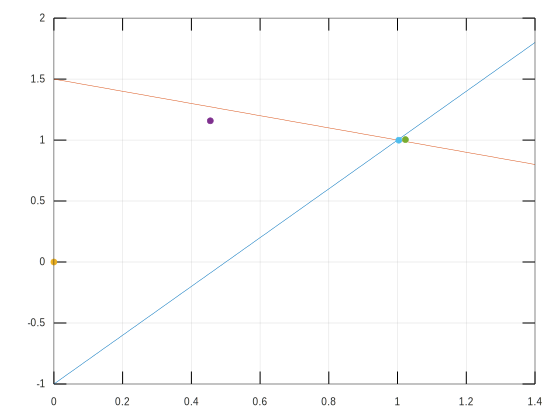

In [4]:
%plot --format svg
%上の行はコメントではなく、図をきれいにする（ベクター画像にする）ためのもの

%図の描画は、前回の演習3のコードを利用すればよい
x_list = 0:0.01:1.4;
y1_list = 2*x_list-1;     %一つ目の方程式に対応する直線の式
y2_list = -x_list/2+3/2;  %二つ目の方程式に対応する直線の式

plot(x_list,y1_list)  %一つ目の直線の描画
grid on               %グリッド線の表示
hold on               %複数のplotを行うために必要
plot(x_list,y2_list)  %二つ目の直線の描画

w = min_w;  %wを上で求めた最適値にする
x = [0;0];
plot(x(1),x(2))  %初期値ベクトルの点の描画
k = 0;

while norm(b-A*x,Inf) >= EPS && k <= K
    for i = 1:n
        tmp = b(i);
        for j = 1:i-1
            tmp = tmp-A(i,j)*x(j);
        end
        for j = i+1:n
            tmp = tmp-A(i,j)*x(j);
        end
        x(i) = (1-w)*x(i)+w*tmp/A(i,i);
    end
    plot(x(1),x(2))  %新たに計算したベクトルの点の描画
    k = k+1;
end

if k > K
    printf("%d回の反復では、近似解を求めることができなかった。\n",K)
else
    printf("%d回の反復で、次の近似解を求めることができた。\n",k)
    printf("%.15f\n",x)
end

### （考察）

SOR法では多くの問題に対して $1<w<2$ のときに収束が速くなると言われているが、ここで考えている問題はそれには当てはまらず、$w$ の最適値が $0<w<1$ の範囲に存在するという結果になった。

SOR法とガウス・ザイデル法によって生成されるベクトルをそれぞれ $x^{(k)}$、$\tilde{x}^{(k)}$ とした際の関係式

$$
x^{(k)}=x^{(k-1)}+w\left(\tilde{x}^{(k)}-x^{(k-1)}\right)
$$

が表すように、「青い直線にぶつかるまで水平に移動した後に、さらにオレンジの直線にぶつかるまで鉛直に移動する」というガウス・ザイデル法と比較して、$w=0.91$ のSOR法では変化量のベクトルを少し縮めて点の移動が行われていることが、描画した図から分かる。

それによって、直線の交点に到達するまでの点の動きの無駄が非常に少なくなっている。